# Análise de Dados de Preços de Casas
## Uma Introdução à Ciência de Dados com Regressão Linear

Neste notebook, vamos aprender os conceitos fundamentais da ciência de dados através de um exemplo prático: **prever o preço de casas** usando características como área, número de quartos, localização, etc.

### Objetivos da Aula:
1. **Carregar e explorar** um dataset de preços de casas
2. **Limpar e preparar** os dados para análise
3. **Analisar correlações** entre variáveis
4. **Construir um modelo de regressão linear** para prever preços
5. **Avaliar e interpretar** os resultados

### O que você vai aprender:
- Como explorar dados de forma sistemática
- Como identificar relacionamentos entre variáveis
- Como construir e avaliar um modelo preditivo simples

Vamos começar!

## 1. Carregamento e Exploração dos Dados

Primeiro, vamos importar as bibliotecas necessárias e carregar nosso dataset.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Carregando o dataset
df = pd.read_csv('Housing.csv')

print("🏠 Dataset de Preços de Casas carregado com sucesso!")
print(f"📊 Dimensões dos dados: {df.shape[0]} linhas e {df.shape[1]} colunas")
print(f"🗂️ Colunas: {list(df.columns)}")

🏠 Dataset de Preços de Casas carregado com sucesso!
📊 Dimensões dos dados: 545 linhas e 13 colunas
🗂️ Colunas: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [3]:
# Visualizando as primeiras linhas dos dados
print("🔍 Primeiras 5 linhas do dataset:")
df.head()

🔍 Primeiras 5 linhas do dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 🇧🇷 Adaptação para o Padrão Brasileiro

Vamos transformar os dados para ficarem mais familiares: área em m², valores em Reais e colunas em português!

In [4]:
# 🇧🇷 Transformando para o padrão brasileiro

print("🔄 Transformando dados para o padrão brasileiro...")

# 1️⃣ Convertendo área de pés para metros quadrados (m²)
# 1 pé quadrado = 0.092903 m²
FATOR_CONVERSAO_AREA = 0.092903
DOLAR_PARA_REAL = 5.5  # Exemplo de taxa de câmbio
df['area'] = (df['area'] * FATOR_CONVERSAO_AREA).round(2)

print(f"✅ Área convertida para m² (fator: {FATOR_CONVERSAO_AREA})")

# 2️⃣ Convertendo preço para Reais (assumindo uma taxa de conversão exemplo)
# Vamos assumir que os valores estão em alguma moeda e vamos convertê-los para um valor mais próximo do real brasileiro
# Para fins didáticos, vamos dividir por 1000 para ter valores mais próximos do mercado brasileiro
df['price'] = df['price'] / DOLAR_PARA_REAL

print(f"✅ Preço ajustado para valores em Reais (R$)")

# 3️⃣ Renomeando colunas para português
colunas_portugues = {
    'price': 'preco',
    'area': 'area_m2',
    'bedrooms': 'quartos',
    'bathrooms': 'banheiros',
    'stories': 'andares',
    'mainroad': 'rua_principal',
    'guestroom': 'quarto_hospedes',
    'basement': 'porao',
    'hotwaterheating': 'aquecimento_agua',
    'airconditioning': 'ar_condicionado',
    'parking': 'vagas_garagem',
    'prefarea': 'area_preferencial',
    'furnishingstatus': 'mobilia'
}

df = df.rename(columns=colunas_portugues)

print("✅ Colunas renomeadas para português:")
for eng, pt in colunas_portugues.items():
    print(f"   • {eng:20} → {pt}")

print("\n✨ Transformação concluída!")

🔄 Transformando dados para o padrão brasileiro...
✅ Área convertida para m² (fator: 0.092903)
✅ Preço ajustado para valores em Reais (R$)
✅ Colunas renomeadas para português:
   • price                → preco
   • area                 → area_m2
   • bedrooms             → quartos
   • bathrooms            → banheiros
   • stories              → andares
   • mainroad             → rua_principal
   • guestroom            → quarto_hospedes
   • basement             → porao
   • hotwaterheating      → aquecimento_agua
   • airconditioning      → ar_condicionado
   • parking              → vagas_garagem
   • prefarea             → area_preferencial
   • furnishingstatus     → mobilia

✨ Transformação concluída!


In [6]:
# Criando função para formatar valores em Reais (padrão brasileiro)
def formatar_reais(valor):
    """
    Formata um valor numérico para o padrão brasileiro de moeda
    Exemplo: 1234567.89 → R$ 1.234.567,89
    """
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# Visualizando os dados após transformação
print("📊 Dados após transformação para padrão brasileiro:")
print("\n🔍 Primeiras 5 casas:")
print(df.head())

print("\n💰 Estatísticas dos preços em Reais:")
print(f"   • Preço mínimo:  {formatar_reais(df['preco'].min())}")
print(f"   • Preço médio:   {formatar_reais(df['preco'].mean())}")
print(f"   • Preço mediano: {formatar_reais(df['preco'].median())}")
print(f"   • Preço máximo:  {formatar_reais(df['preco'].max())}")

print(f"\n📏 Estatísticas da área em m²:")
print(f"   • Área mínima:   {df['area_m2'].min():.2f} m²")
print(f"   • Área média:    {df['area_m2'].mean():.2f} m²")
print(f"   • Área mediana:  {df['area_m2'].median():.2f} m²")
print(f"   • Área máxima:   {df['area_m2'].max():.2f} m²")

📊 Dados após transformação para padrão brasileiro:

🔍 Primeiras 5 casas:
          preco  area_m2  quartos  banheiros  andares rua_principal  \
0  2.418182e+06   689.34        4          2        3           yes   
1  2.227273e+06   832.41        4          4        4           yes   
2  2.227273e+06   925.31        3          2        2           yes   
3  2.220909e+06   696.77        4          2        2           yes   
4  2.074545e+06   689.34        4          1        2           yes   

  quarto_hospedes porao aquecimento_agua ar_condicionado  vagas_garagem  \
0              no    no               no             yes              2   
1              no    no               no             yes              3   
2              no   yes               no              no              2   
3              no   yes               no             yes              3   
4             yes   yes               no             yes              2   

  area_preferencial         mobilia  
0          

### ✅ Resumo das Transformações

✔️ **Área convertida** de pés quadrados para **metros quadrados (m²)**  
✔️ **Preços ajustados** para valores em **Reais (R$)**  
✔️ **Colunas renomeadas** para **português**  
✔️ **Formato brasileiro** com ponto para milhares e vírgula para decimais

Agora os dados estão prontos para análise no padrão brasileiro! 🇧🇷

In [7]:
# Informações gerais sobre o dataset
print("📋 Informações sobre o dataset:")
df.info()

📋 Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preco              545 non-null    float64
 1   area_m2            545 non-null    float64
 2   quartos            545 non-null    int64  
 3   banheiros          545 non-null    int64  
 4   andares            545 non-null    int64  
 5   rua_principal      545 non-null    object 
 6   quarto_hospedes    545 non-null    object 
 7   porao              545 non-null    object 
 8   aquecimento_agua   545 non-null    object 
 9   ar_condicionado    545 non-null    object 
 10  vagas_garagem      545 non-null    int64  
 11  area_preferencial  545 non-null    object 
 12  mobilia            545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [8]:
# Estatísticas descritivas
print("📊 Estatísticas descritivas das variáveis numéricas:")
df.describe()

📊 Estatísticas descritivas das variáveis numéricas:


,preco,area_m2,quartos,banheiros,andares,vagas_garagem
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,8.666780e+05,478.500954,2.965138,1.286239,1.805505,0.693578
std,3.400799e+05,201.612640,0.738064,0.502470,0.867492,0.861586
min,3.181818e+05,153.290000,1.000000,1.000000,1.000000,0.000000
25%,6.236364e+05,334.450000,2.000000,1.000000,1.000000,0.000000
50%,7.890909e+05,427.350000,3.000000,1.000000,2.000000,0.000000
75%,1.043636e+06,590.860000,3.000000,2.000000,2.000000,1.000000
max,2.418182e+06,1505.030000,6.000000,4.000000,4.000000,3.000000


## 2. Limpeza e Preparação dos Dados

Agora vamos verificar se existem dados faltantes e preparar nossos dados para análise.

In [9]:
# Verificando valores ausentes
print("🔍 Verificando valores ausentes:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ Ótimo! Não há valores ausentes no dataset.")
else:
    print(f"⚠️  Encontrados {missing_values.sum()} valores ausentes.")

🔍 Verificando valores ausentes:
preco                0
area_m2              0
quartos              0
banheiros            0
andares              0
rua_principal        0
quarto_hospedes      0
porao                0
aquecimento_agua     0
ar_condicionado      0
vagas_garagem        0
area_preferencial    0
mobilia              0
dtype: int64
✅ Ótimo! Não há valores ausentes no dataset.


In [10]:
# Convertendo variáveis categóricas para numéricas
print("🔧 Convertendo variáveis categóricas (yes/no) para numéricas (1/0):")

# Lista de colunas categóricas que precisam ser convertidas (usando nomes em português)
categorical_columns = ['rua_principal', 'quarto_hospedes', 'porao', 'aquecimento_agua', 
                      'ar_condicionado', 'area_preferencial']

# Convertendo yes/no para 1/0
for col in categorical_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})
    print(f"✓ {col}: convertido")

# Para mobilia, vamos usar codificação ordinal
furnishing_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['mobilia'] = df['mobilia'].map(furnishing_mapping)
print("✓ mobilia: convertido (unfurnished=0, semi-furnished=1, furnished=2)")

🔧 Convertendo variáveis categóricas (yes/no) para numéricas (1/0):
✓ rua_principal: convertido
✓ quarto_hospedes: convertido
✓ porao: convertido
✓ aquecimento_agua: convertido
✓ ar_condicionado: convertido
✓ area_preferencial: convertido
✓ mobilia: convertido (unfurnished=0, semi-furnished=1, furnished=2)


In [11]:
# Verificando os dados após conversão
print("📋 Dados após conversão:")
df.head()

📋 Dados após conversão:


,preco,area_m2,quartos,banheiros,andares,rua_principal,quarto_hospedes,porao,aquecimento_agua,ar_condicionado,vagas_garagem,area_preferencial,mobilia
0,2.418182e+06,689.34,4,2,3,1,0,0,0,1,2,1,2
1,2.227273e+06,832.41,4,4,4,1,0,0,0,1,3,0,2
2,2.227273e+06,925.31,3,2,2,1,0,1,0,0,2,1,1
3,2.220909e+06,696.77,4,2,2,1,0,1,0,1,3,1,2
4,2.074545e+06,689.34,4,1,2,1,1,1,0,1,2,0,2


## 3. Análise Exploratória de Dados (EDA)

Vamos criar algumas visualizações para entender melhor nossos dados.

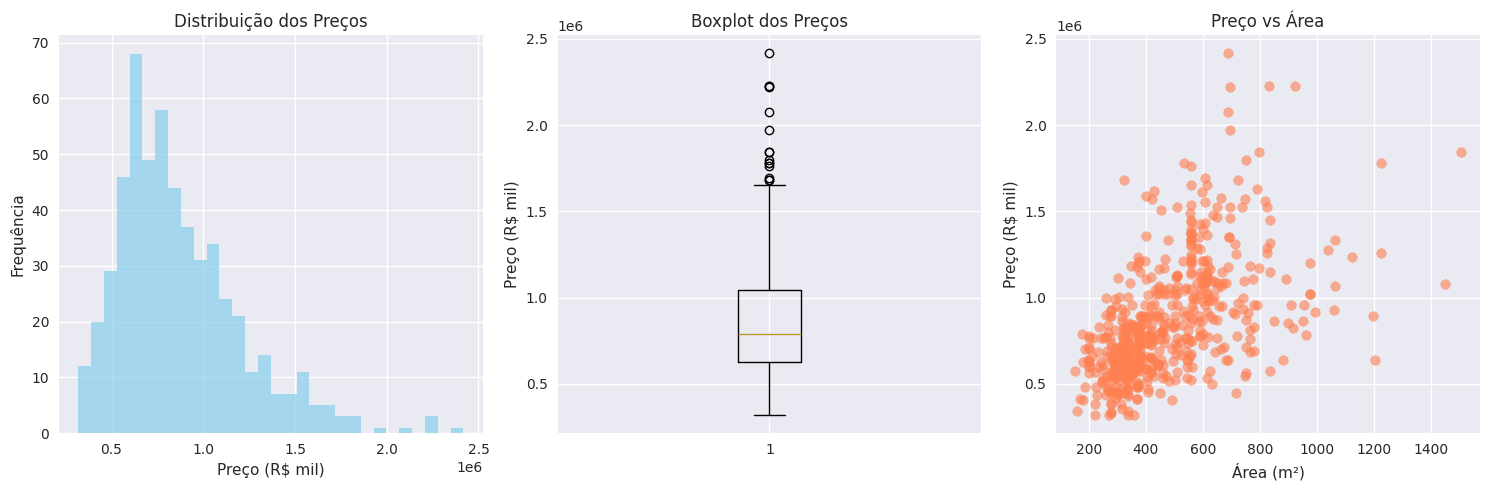

💰 Preço médio: R$ 866,678.05 mil
💰 Preço mediano: R$ 789,090.91 mil
📏 Área média: 478.50 m²
🔍 Interpretando os resultados:
A distribuição dos preços mostra que a maioria das casas está concentrada em uma faixa de preço mais baixa,
com alguns valores extremos (outliers) que elevam a média. A mediana é menor que a média, indicando uma distribuição assimétrica.
A relação entre preço e área sugere que, em geral, casas maiores tendem a ser mais caras, mas há variações significativas.


In [12]:
# Distribuição dos preços das casas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['preco'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribuição dos Preços')
plt.xlabel('Preço (R$ mil)')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.boxplot(df['preco'])
plt.title('Boxplot dos Preços')
plt.ylabel('Preço (R$ mil)')

plt.subplot(1, 3, 3)
plt.scatter(df['area_m2'], df['preco'], alpha=0.6, color='coral')
plt.title('Preço vs Área')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$ mil)')

plt.tight_layout()
plt.show()

print(f"💰 Preço médio: R$ {df['preco'].mean():,.2f} mil")
print(f"💰 Preço mediano: R$ {df['preco'].median():,.2f} mil")
print(f"📏 Área média: {df['area_m2'].mean():,.2f} m²")

print(f"🔍 Interpretando os resultados:")
print(f"A distribuição dos preços mostra que a maioria das casas está concentrada em uma faixa de preço mais baixa,")
print(f"com alguns valores extremos (outliers) que elevam a média. A mediana é menor que a média, indicando uma distribuição assimétrica.")
print(f"A relação entre preço e área sugere que, em geral, casas maiores tendem a ser mais caras, mas há variações significativas.")

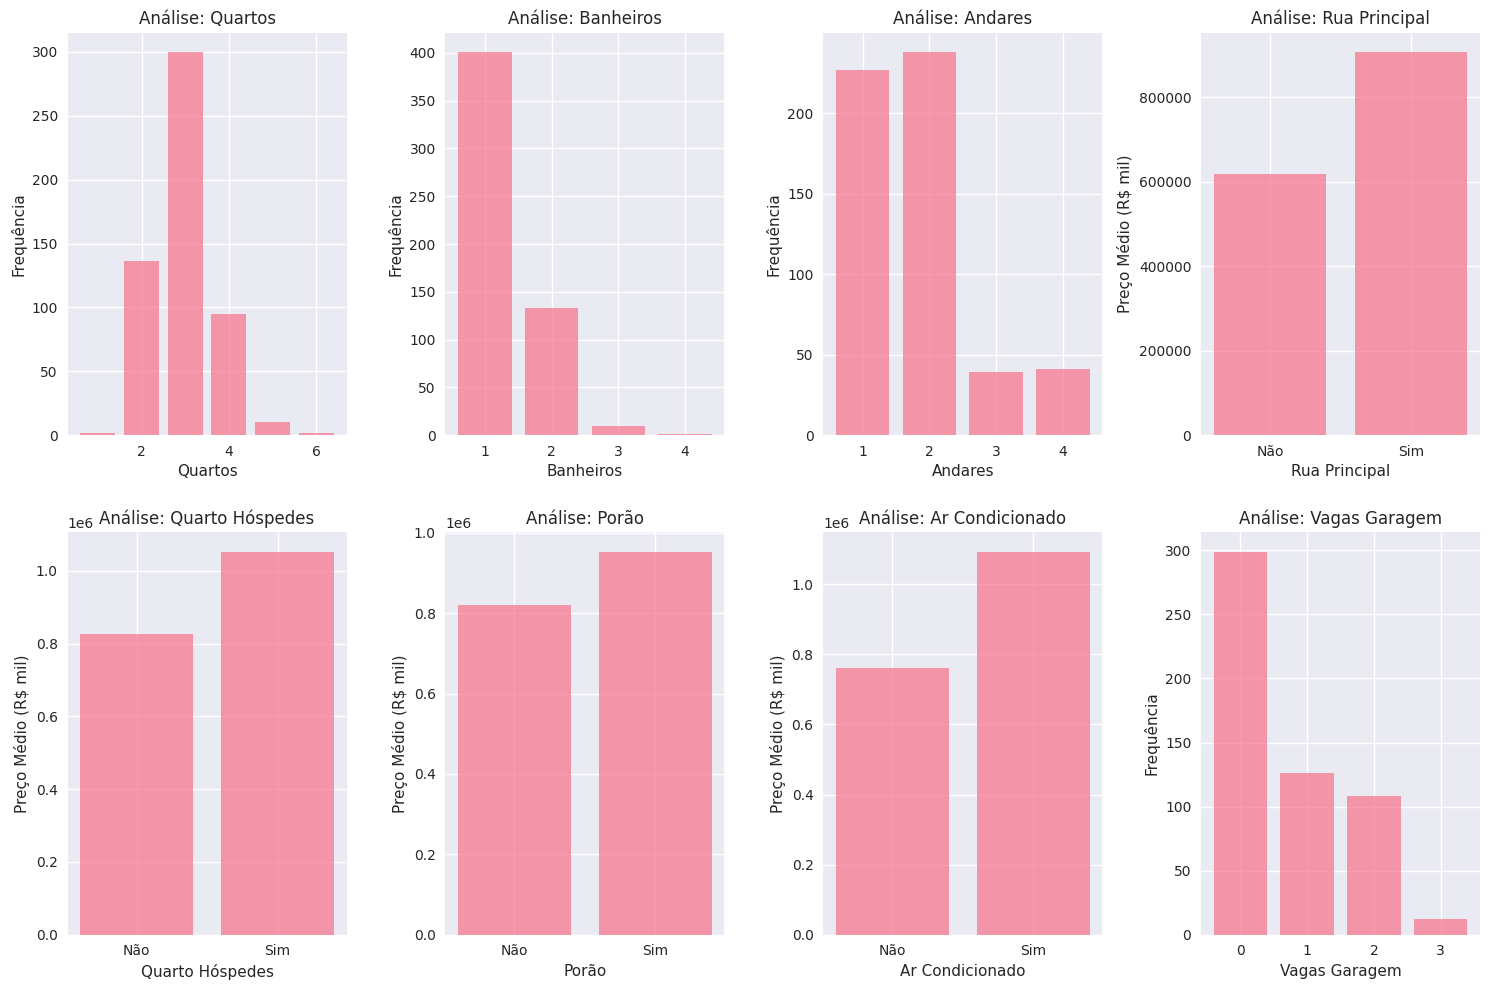

In [13]:
# Análise das características categóricas
plt.figure(figsize=(15, 10))

categorical_features = ['quartos', 'banheiros', 'andares', 'rua_principal', 
                       'quarto_hospedes', 'porao', 'ar_condicionado', 'vagas_garagem']

feature_labels = {
    'quartos': 'Quartos',
    'banheiros': 'Banheiros', 
    'andares': 'Andares',
    'rua_principal': 'Rua Principal',
    'quarto_hospedes': 'Quarto Hóspedes',
    'porao': 'Porão',
    'ar_condicionado': 'Ar Condicionado',
    'vagas_garagem': 'Vagas Garagem'
}

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    
    if feature in ['quartos', 'banheiros', 'andares', 'vagas_garagem']:
        # Para variáveis discretas
        counts = df[feature].value_counts().sort_index()
        plt.bar(counts.index, counts.values, alpha=0.7)
        plt.xlabel(feature_labels[feature])
        plt.ylabel('Frequência')
    else:
        # Para variáveis binárias
        avg_price = df.groupby(feature)['preco'].mean()
        labels = ['Não', 'Sim'] if len(avg_price) == 2 else avg_price.index
        plt.bar(range(len(avg_price)), avg_price.values, alpha=0.7)
        plt.xticks(range(len(avg_price)), labels)
        plt.xlabel(feature_labels[feature])
        plt.ylabel('Preço Médio (R$ mil)')
    
    plt.title(f'Análise: {feature_labels[feature]}')

plt.tight_layout()
plt.show()

## 4. Análise de Correlação

Agora vamos analisar como as diferentes variáveis se relacionam entre si e com o preço das casas.

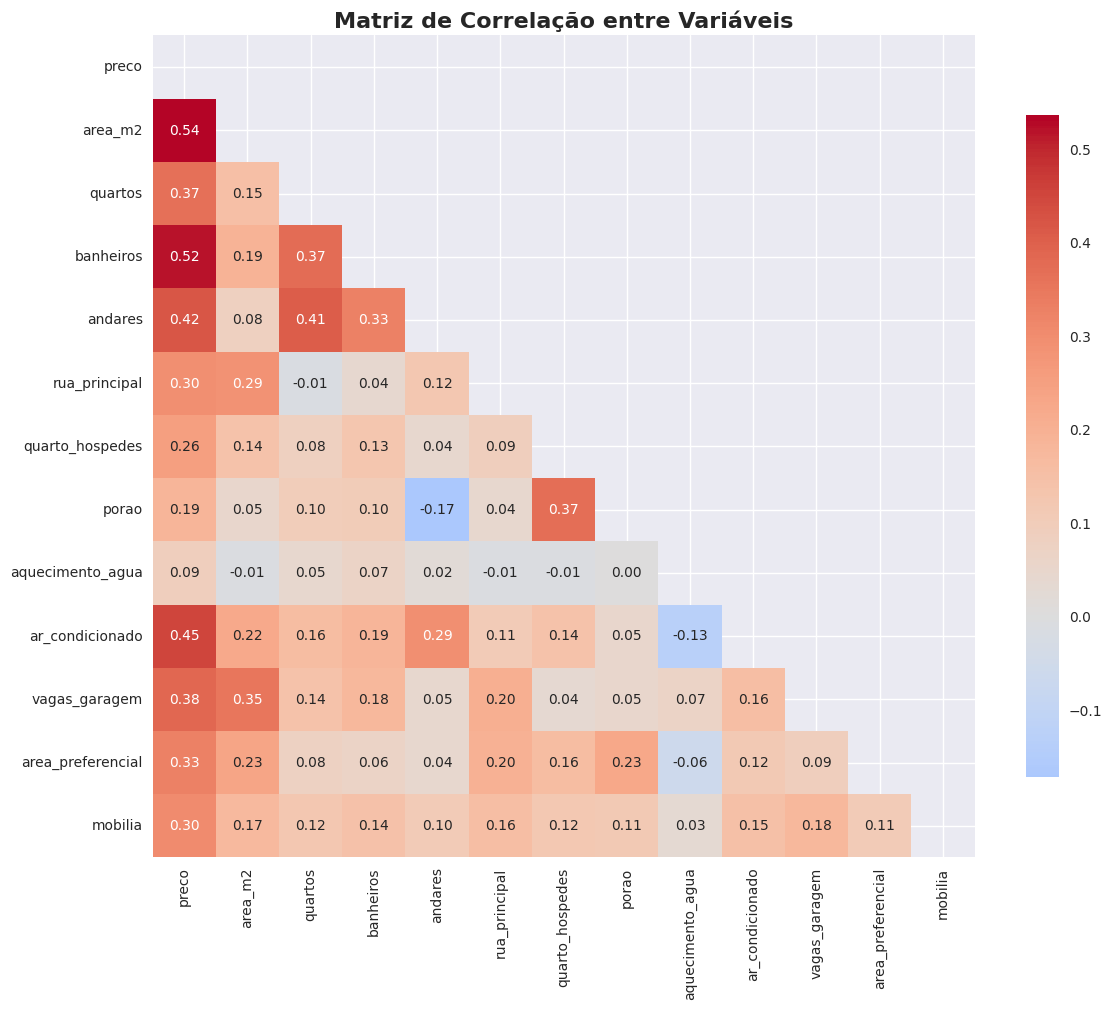

In [14]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mascarar a parte superior
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
# Analisando as correlações com o preço
price_correlations = correlation_matrix['preco'].sort_values(ascending=False)

print("🔍 Correlações com o preço das casas:")
print("=" * 40)
for variable, correlation in price_correlations.items():
    if variable != 'preco':  # Excluir a correlação de preço consigo mesmo
        if abs(correlation) > 0.3:
            emoji = "🔥" if abs(correlation) > 0.5 else "📈"
            print(f"{emoji} {variable:20}: {correlation:+.3f}")
        else:
            print(f"📊 {variable:20}: {correlation:+.3f}")

print("\n💡 Interpretação:")
print("• Correlações próximas de +1: relação positiva forte")
print("• Correlações próximas de -1: relação negativa forte") 
print("• Correlações próximas de 0: relação fraca")

🔍 Correlações com o preço das casas:
🔥 area_m2             : +0.536
🔥 banheiros           : +0.518
📈 ar_condicionado     : +0.453
📈 andares             : +0.421
📈 vagas_garagem       : +0.384
📈 quartos             : +0.366
📈 area_preferencial   : +0.330
📈 mobilia             : +0.305
📊 rua_principal       : +0.297
📊 quarto_hospedes     : +0.256
📊 porao               : +0.187
📊 aquecimento_agua    : +0.093

💡 Interpretação:
• Correlações próximas de +1: relação positiva forte
• Correlações próximas de -1: relação negativa forte
• Correlações próximas de 0: relação fraca


## 5. Preparação dos Dados para Modelagem

Agora vamos preparar nossos dados para construir o modelo de regressão.

In [17]:
# Separando variáveis independentes (X) e dependente (y)
X = df.drop('preco', axis=1)  # Todas as colunas exceto 'preco'
y = df['preco']               # Apenas a coluna 'preco'


#Selecionando variaveis especificas
# X = df[['area_m2', 'quartos', 'banheiros']]  # Selecionando apenas algumas colunas

print("🎯 Variável dependente (y):")
print(f"   • {y.name} - o que queremos prever")
print(f"   • Formato: {y.shape}")

print("\n🔧 Variáveis independentes (X):")
print(f"   • Features: {list(X.columns)}")
print(f"   • Formato: {X.shape}")
print(f"   • Total de features: {X.shape[1]}")

🎯 Variável dependente (y):
   • preco - o que queremos prever
   • Formato: (545,)

🔧 Variáveis independentes (X):
   • Features: ['area_m2', 'quartos', 'banheiros', 'andares', 'rua_principal', 'quarto_hospedes', 'porao', 'aquecimento_agua', 'ar_condicionado', 'vagas_garagem', 'area_preferencial', 'mobilia']
   • Formato: (545, 12)
   • Total de features: 12


In [18]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para teste, 80% para treino
    random_state=42     # Para reprodutibilidade
)

print("📊 Divisão dos dados:")
print(f"   • Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(df)*100:.0f}%)")
print(f"   • Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(df)*100:.0f}%)")
print(f"   • Total:  {len(df)} amostras")

print("\n💡 Por que dividir os dados?")
print("   • Treino: para o modelo aprender padrões")
print("   • Teste: para avaliar como o modelo se comporta em dados novos")

📊 Divisão dos dados:
   • Treino: 436 amostras (80%)
   • Teste:  109 amostras (20%)
   • Total:  545 amostras

💡 Por que dividir os dados?
   • Treino: para o modelo aprender padrões
   • Teste: para avaliar como o modelo se comporta em dados novos


## 6. Construção do Modelo de Regressão

Vamos construir nosso modelo de regressão linear para prever o preço das casas!

In [19]:
# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

print("🚀 Modelo treinado com sucesso!")
print(f"   • Algoritmo: Regressão Linear")
print(f"   • Dados de treino: {X_train.shape[0]} amostras")
print(f"   • Features utilizadas: {X_train.shape[1]}")

print("\n🧠 O modelo aprendeu a relação:")
print("   price = intercept + (coef1 × area) + (coef2 × bedrooms) + ...")

🚀 Modelo treinado com sucesso!
   • Algoritmo: Regressão Linear
   • Dados de treino: 436 amostras
   • Features utilizadas: 12

🧠 O modelo aprendeu a relação:
   price = intercept + (coef1 × area) + (coef2 × bedrooms) + ...


In [20]:
# Fazendo previsões
y_train_pred = model.predict(X_train)  # Previsões no conjunto de treino
y_test_pred = model.predict(X_test)    # Previsões no conjunto de teste

print("🎯 Previsões realizadas:")
print(f"   • Treino: {len(y_train_pred)} previsões")
print(f"   • Teste:  {len(y_test_pred)} previsões")

# Exemplo de algumas previsões
print(f"\n📊 Exemplos de previsões (conjunto de teste):")
for i in range(5):
    real = y_test.iloc[i]
    previsto = y_test_pred[i]
    diferenca = abs(real - previsto)
    print(f"   Casa {i+1}: Real={real:,.0f}, Previsto={previsto:,.0f}, Diferença={diferenca:,.0f}")

🎯 Previsões realizadas:
   • Treino: 436 previsões
   • Teste:  109 previsões

📊 Exemplos de previsões (conjunto de teste):
   Casa 1: Real=738,182, Previsto=946,127, Diferença=207,945
   Casa 2: Real=1,209,091, Previsto=1,319,455, Diferença=110,364
   Casa 3: Real=674,545, Previsto=556,879, Diferença=117,667
   Casa 4: Real=1,170,909, Previsto=829,019, Diferença=341,890
   Casa 5: Real=509,091, Previsto=605,990, Diferença=96,899


## 7. Avaliação do Modelo

Agora vamos avaliar quão bem nosso modelo está funcionando usando métricas estatísticas.

In [21]:
# Calculando métricas de avaliação
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("📊 MÉTRICAS DE AVALIAÇÃO DO MODELO")
print("=" * 60)

print("\n🎯 R² Score (Coeficiente de Determinação):")
print(f"   • Treino: {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   • Teste:  {r2_test:.4f} ({r2_test*100:.2f}%)")
print("   💡 Quanto mais próximo de 1, melhor o modelo explica os dados")

print("\n📏 MAE (Mean Absolute Error - Erro Médio Absoluto):")
print(f"   • Treino: {mae_train:,.2f}")
print(f"   • Teste:  {mae_test:,.2f}")
print("   💡 Erro médio em unidades monetárias (quanto menor, melhor)")

print("\n📐 RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio):")
print(f"   • Treino: {rmse_train:,.2f}")
print(f"   • Teste:  {rmse_test:,.2f}")
print("   💡 Penaliza erros maiores (quanto menor, melhor)")

# Análise da performance
print("\n🔍 ANÁLISE DA PERFORMANCE:")
if r2_test > 0.7:
    print("   ✅ Modelo com boa capacidade preditiva!")
elif r2_test > 0.5:
    print("   ⚠️  Modelo com capacidade preditiva moderada")
else:
    print("   ❌ Modelo precisa de melhorias")

if abs(r2_train - r2_test) < 0.05:
    print("   ✅ Modelo bem generalizado (sem overfitting)")
else:
    print("   ⚠️  Possível overfitting - modelo se ajusta demais aos dados de treino")

📊 MÉTRICAS DE AVALIAÇÃO DO MODELO

🎯 R² Score (Coeficiente de Determinação):
   • Treino: 0.6854 (68.54%)
   • Teste:  0.6495 (64.95%)
   💡 Quanto mais próximo de 1, melhor o modelo explica os dados

📏 MAE (Mean Absolute Error - Erro Médio Absoluto):
   • Treino: 130,572.01
   • Teste:  178,123.76
   💡 Erro médio em unidades monetárias (quanto menor, melhor)

📐 RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio):
   • Treino: 179,061.17
   • Teste:  242,013.08
   💡 Penaliza erros maiores (quanto menor, melhor)

🔍 ANÁLISE DA PERFORMANCE:
   ⚠️  Modelo com capacidade preditiva moderada
   ✅ Modelo bem generalizado (sem overfitting)


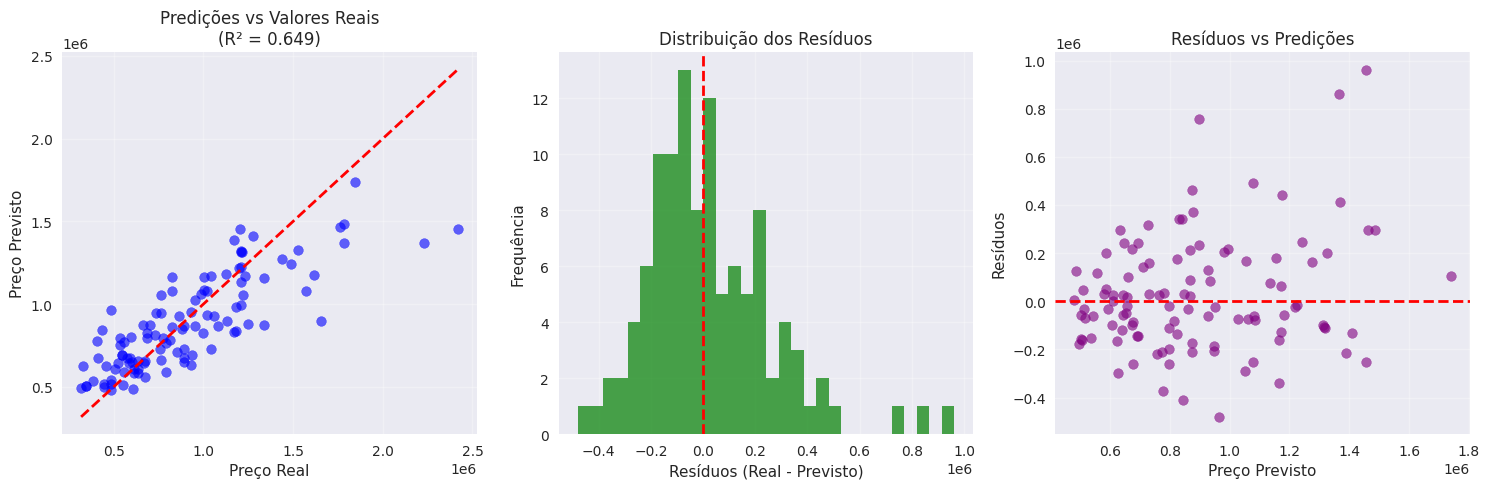

💡 Interpretação dos gráficos:
   • Gráfico 1: Pontos próximos à linha vermelha = boas predições
   • Gráfico 2: Resíduos centrados em 0 = modelo não enviesado
   • Gráfico 3: Padrão aleatório = modelo captura bem os padrões


In [22]:
# Visualizando a performance do modelo
plt.figure(figsize=(15, 5))

# Gráfico 1: Valores Reais vs Preditos (Teste)
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title(f'Predições vs Valores Reais\n(R² = {r2_test:.3f})')
plt.grid(True, alpha=0.3)

# Gráfico 2: Distribuição dos Resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_test_pred
plt.hist(residuals, bins=30, alpha=0.7, color='green')
plt.xlabel('Resíduos (Real - Previsto)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

# Gráfico 3: Resíduos vs Valores Preditos
plt.subplot(1, 3, 3)
plt.scatter(y_test_pred, residuals, alpha=0.6, color='purple')
plt.xlabel('Preço Previsto')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Predições')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretação dos gráficos:")
print("   • Gráfico 1: Pontos próximos à linha vermelha = boas predições")
print("   • Gráfico 2: Resíduos centrados em 0 = modelo não enviesado")
print("   • Gráfico 3: Padrão aleatório = modelo captura bem os padrões")

## 8. Interpretação dos Resultados

Vamos entender quais características mais influenciam o preço das casas segundo nosso modelo.

### 🎮 Simulador de Preços

Agora você pode simular o preço de uma casa ajustando os valores das características abaixo!

In [23]:
# Analisando os coeficientes do modelo
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Ordenando por valor absoluto do coeficiente
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("🔍 IMPORTÂNCIA DAS VARIÁVEIS NO MODELO")
print("=" * 70)
print(f"\n📌 Intercepto (valor base): {model.intercept_:,.2f}")
print("\n📊 Coeficientes (impacto de cada variável no preço):")
print("-" * 70)

for idx, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    
    if coef > 0:
        direction = "↑ Aumenta"
        emoji = "🔼"
    else:
        direction = "↓ Diminui"
        emoji = "🔽"
    
    print(f"{emoji} {feature:20} {direction:10} {coef:+15,.2f}")

print("\n💡 Interpretação:")
print("   • Coeficientes positivos: aumentam o preço")
print("   • Coeficientes negativos: diminuem o preço")
print("   • Magnitude maior = maior influência no preço")

🔍 IMPORTÂNCIA DAS VARIÁVEIS NO MODELO

📌 Intercepto (valor base): -23,219.91

📊 Coeficientes (impacto de cada variável no preço):
----------------------------------------------------------------------
🔼 banheiros            ↑ Aumenta      +199,476.00
🔼 ar_condicionado      ↑ Aumenta      +142,827.39
🔼 aquecimento_agua     ↑ Aumenta      +125,069.73
🔼 area_preferencial    ↑ Aumenta      +114,527.29
🔼 andares              ↑ Aumenta       +73,858.71
🔼 porao                ↑ Aumenta       +71,483.86
🔼 rua_principal        ↑ Aumenta       +66,694.99
🔼 quarto_hospedes      ↑ Aumenta       +42,390.26
🔼 vagas_garagem        ↑ Aumenta       +41,046.57
🔼 mobilia              ↑ Aumenta       +38,254.07
🔼 quartos              ↑ Aumenta       +14,286.16
🔼 area_m2              ↑ Aumenta          +461.57

💡 Interpretação:
   • Coeficientes positivos: aumentam o preço
   • Coeficientes negativos: diminuem o preço
   • Magnitude maior = maior influência no preço


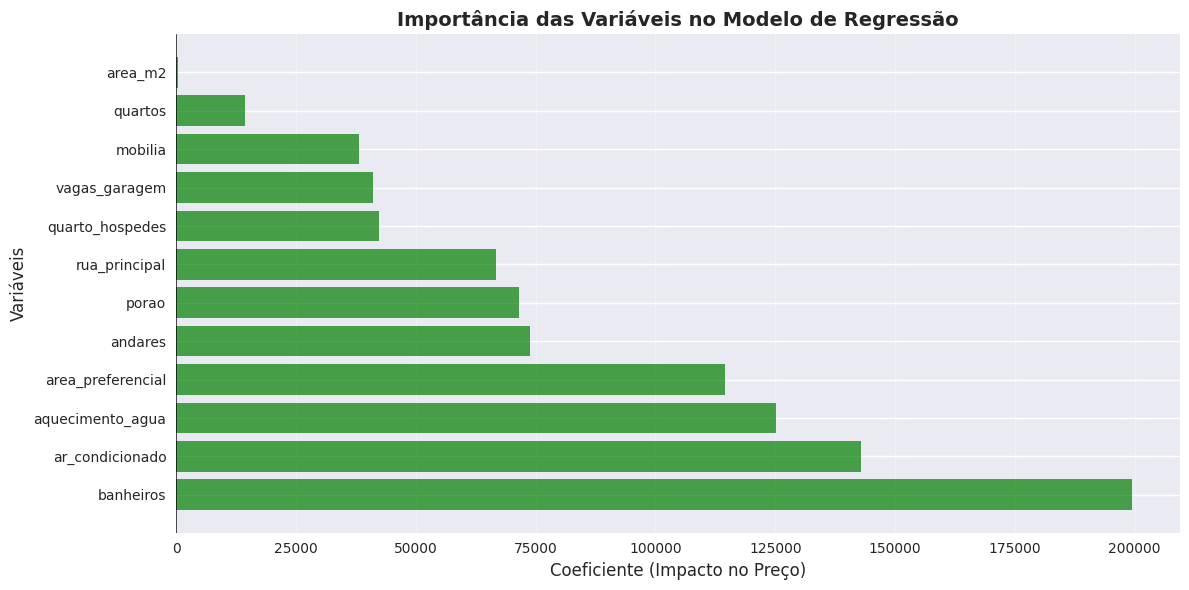

🎨 No gráfico:
   🟢 Verde: características que aumentam o preço
   🔴 Vermelho: características que diminuem o preço


In [24]:
# Visualizando a importância das variáveis
plt.figure(figsize=(12, 6))

colors = ['green' if c > 0 else 'red' for c in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coeficiente (Impacto no Preço)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.title('Importância das Variáveis no Modelo de Regressão', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("🎨 No gráfico:")
print("   🟢 Verde: características que aumentam o preço")
print("   🔴 Vermelho: características que diminuem o preço")

In [27]:
# 🏠 SIMULADOR DE PREÇOS DE CASAS (Padrão Brasileiro)
# Ajuste os valores abaixo para simular o preço de uma casa

print("="*70)
print("🏠 SIMULADOR DE PREÇOS DE CASAS - BRASIL".center(70))
print("="*70)

# ============================================================
# 👇 ALTERE OS VALORES AQUI PARA FAZER SUA SIMULAÇÃO
# ============================================================

# Características numéricas
area_m2 = 200           # Área da casa em metros quadrados (m²)
quartos = 3                # Número de quartos
banheiros = 2              # Número de banheiros
andares = 2                # Número de andares
vagas_garagem = 2          # Número de vagas de garagem

#Características binárias (0 = Não, 1 = Sim)
rua_principal = 1          # Na rua principal? (0=Não, 1=Sim)
quarto_hospedes = 1        # Tem quarto de hóspedes? (0=Não, 1=Sim)
porao = 0                  # Tem porão? (0=Não, 1=Sim)
aquecimento_agua = 0       # Tem aquecimento de água? (0=Não, 1=Sim)
ar_condicionado = 1        # Tem ar condicionado? (0=Não, 1=Sim)
area_preferencial = 1      # Em área preferencial? (0=Não, 1=Sim)

#Status de mobília (0=Sem móveis, 1=Semi-mobiliada, 2=Mobiliada)
mobilia = 1                # 0=unfurnished, 1=semi-furnished, 2=furnished

#============================================================
#🎯 CALCULANDO O PREÇO PREVISTO
#============================================================

#Criando o vetor de features na ordem correta
features_simulacao = np.array([[
    area_m2, quartos, banheiros, andares, rua_principal, quarto_hospedes, 
    porao, aquecimento_agua, ar_condicionado, vagas_garagem, 
    area_preferencial, mobilia
]])

# features_simulacao = np.array([[
#    area_m2, quartos, banheiros
# ]])

# Fazendo a previsão
preco_previsto_mil = model.predict(features_simulacao)[0]

# Função para formatar em reais
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# ============================================================
# 📊 RESULTADO DA SIMULAÇÃO
# ============================================================

print("\n" + "="*70)
print("📋 CARACTERÍSTICAS DA CASA SIMULADA".center(70))
print("="*70)

print(f"\n📐 Dimensões e Estrutura:")
print(f"   • Área: {area_m2:,.2f} m²".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"   • Quartos: {quartos}")
print(f"   • Banheiros: {banheiros}")
print(f"   • Andares: {andares}")
print(f"   • Vagas de garagem: {vagas_garagem}")

print(f"\n🏡 Características:")
print(f"   • Rua principal: {'✅ Sim' if rua_principal == 1 else '❌ Não'}")
print(f"   • Quarto de hóspedes: {'✅ Sim' if quarto_hospedes == 1 else '❌ Não'}")
print(f"   • Porão: {'✅ Sim' if porao == 1 else '❌ Não'}")
print(f"   • Aquecimento de água: {'✅ Sim' if aquecimento_agua == 1 else '❌ Não'}")
print(f"   • Ar condicionado: {'✅ Sim' if ar_condicionado == 1 else '❌ Não'}")
print(f"   • Área preferencial: {'✅ Sim' if area_preferencial == 1 else '❌ Não'}")

furnishing_status_map = {0: '🔲 Sem móveis', 1: '📦 Semi-mobiliada', 2: '🛋️  Mobiliada'}
print(f"   • Mobília: {furnishing_status_map[mobilia]}")

print("\n" + "="*70)
# Convertendo de mil reais para reais completos
preco_final = preco_previsto_mil
print(f"💰 PREÇO PREVISTO: {formatar_reais(preco_final)}".center(80))
print("="*70)

print("\n💡 Dica: Altere os valores na seção marcada acima e execute")
print("   novamente esta célula para simular diferentes cenários!")
print("\n" + "="*70)

               🏠 SIMULADOR DE PREÇOS DE CASAS - BRASIL                

                  📋 CARACTERÍSTICAS DA CASA SIMULADA                  

📐 Dimensões e Estrutura:
   • Área: 200,00 m²
   • Quartos: 3
   • Banheiros: 2
   • Andares: 2
   • Vagas de garagem: 2

🏡 Características:
   • Rua principal: ✅ Sim
   • Quarto de hóspedes: ✅ Sim
   • Porão: ❌ Não
   • Aquecimento de água: ❌ Não
   • Ar condicionado: ✅ Sim
   • Área preferencial: ✅ Sim
   • Mobília: 📦 Semi-mobiliada

                       💰 PREÇO PREVISTO: R$ 1.145.409,96                        

💡 Dica: Altere os valores na seção marcada acima e execute
   novamente esta célula para simular diferentes cenários!



## 🎓 Conclusões e Aprendizados

### O que aprendemos nesta aula:

1. **Análise Exploratória de Dados (EDA)**
   - Como carregar e explorar um dataset
   - Identificar padrões e distribuições nos dados
   - Visualizar relações entre variáveis

2. **Análise de Correlação**
   - Como calcular correlações entre variáveis
   - Identificar quais características mais se relacionam com o preço
   - Interpretar matrizes de correlação

3. **Preparação de Dados**
   - Converter variáveis categóricas em numéricas
   - Dividir dados em treino e teste
   - Preparar features para modelagem

4. **Modelagem Preditiva**
   - Construir um modelo de regressão linear
   - Fazer previsões de preços de casas
   - Avaliar a performance do modelo

5. **Interpretação de Resultados**
   - Entender métricas como R², MAE e RMSE
   - Analisar coeficientes do modelo
   - Identificar variáveis mais importantes

### 🚀 Próximos Passos:

- Experimentar com outros algoritmos (Random Forest, XGBoost)
- Criar novas features combinando as existentes
- Testar transformações nas variáveis (log, normalização)
- Remover outliers e ver o impacto no modelo
- Aplicar técnicas de feature selection

### 📚 Conceitos-Chave:

- **Regressão Linear**: modelo que encontra uma linha (ou hiperplano) que melhor se ajusta aos dados
- **R² Score**: mede o quanto o modelo explica a variabilidade dos dados (0 a 1)
- **Overfitting**: quando o modelo decora os dados de treino mas não generaliza bem
- **Correlação**: medida de relacionamento linear entre duas variáveis (-1 a +1)